In [13]:
import sympy as sp

# Symboles
y, y_hat, delta = sp.symbols('y y_hat delta', real=True)  # préciser real=True

# Erreur
error = y - y_hat

# Perte de Huber
huber = sp.Piecewise(
    (0.5*error**2, sp.Abs(error) <= delta),
    (delta*sp.Abs(error) - 0.5*delta**2, sp.Abs(error) > delta)
)

# Gradient par rapport à y_hat
grad_huber = sp.diff(huber, y_hat)

print('le gradient de Huber = ')
# Affichage propre
sp.pprint(grad_huber)


le gradient de Huber = 
⎧-1.0⋅y + 1.0⋅yₕₐₜ  for δ ≥ │y - yₕₐₜ│
⎨                                     
⎩-δ⋅sign(y - yₕₐₜ)      otherwise     


 Convexité

La perte de Huber est convexe par rapport à 
y^ pour tout 
δ>0.

En effet :

La partie quadratique (
∣y−y^∣≤δ) est convexe (MSE).

La partie linéaire (
∣y−y^∣>δ) est convexe (MAE).

 Donc Huber est globalement convexe.

In [14]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Sélection classe versicolor
df_reg = df[df['species']==1][['sepal length (cm)','sepal width (cm)','petal length (cm)']]
df_reg.head()


,sepal length (cm),sepal width (cm),petal length (cm)
50,7.0,3.2,4.7
51,6.4,3.2,4.5
52,6.9,3.1,4.9
53,5.5,2.3,4.0
54,6.5,2.8,4.6


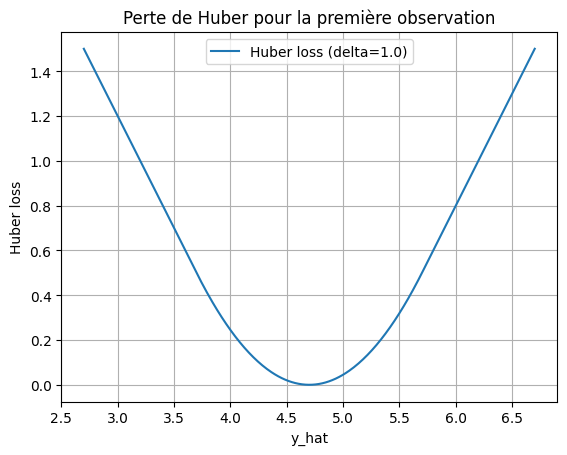

In [15]:
import numpy as np
import matplotlib.pyplot as plt

y_obs = df_reg['petal length (cm)'].iloc[0]
delta_val = 1.0

y_hat_vals = np.linspace(y_obs-2, y_obs+2, 400)
huber_vals = []

for y_hat0 in y_hat_vals:
    e = y_obs - y_hat0
    if abs(e) <= delta_val:
        huber_vals.append(0.5 * e**2)
    else:
        huber_vals.append(delta_val * abs(e) - 0.5 * delta_val**2)

plt.plot(y_hat_vals, huber_vals, label=f"Huber loss (delta={delta_val})")
plt.title("Perte de Huber pour la première observation")
plt.xlabel("y_hat")
plt.ylabel("Huber loss")
plt.grid(True)
plt.legend()
plt.show()


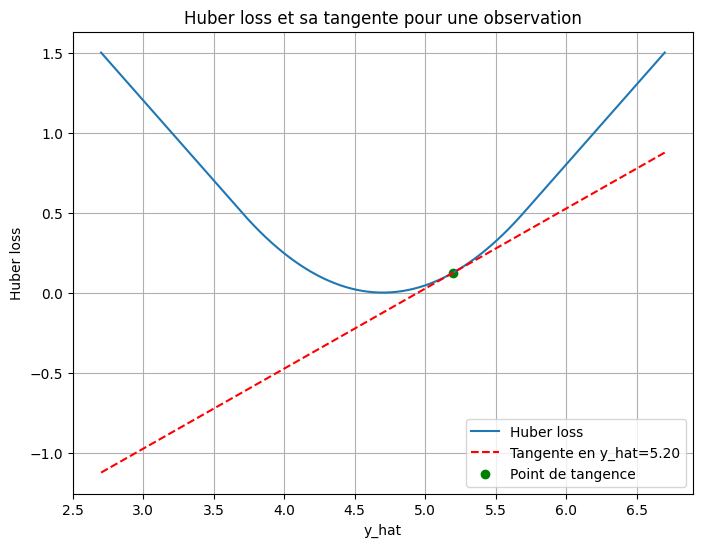

In [16]:
y_hat0 = y_obs + 0.5
e = y_obs - y_hat0

# Gradient à ce point
if abs(e) <= delta_val:
    slope = -e
else:
    slope = -delta_val * np.sign(e)

# Valeur de la Huber loss au point
huber0 = 0.5*e**2 if abs(e)<=delta_val else delta_val*abs(e)-0.5*delta_val**2

# Equation de la tangente
tangent_vals = slope * (y_hat_vals - y_hat0) + huber0

# Tracé
plt.figure(figsize=(8,6))
plt.plot(y_hat_vals, huber_vals, label="Huber loss")
plt.plot(y_hat_vals, tangent_vals, 'r--', label=f"Tangente en y_hat={y_hat0:.2f}")
plt.scatter([y_hat0], [huber0], color='green', label="Point de tangence")
plt.xlabel("y_hat")
plt.ylabel("Huber loss")
plt.title("Huber loss et sa tangente pour une observation")
plt.grid(True)
plt.legend()
plt.show()
